In [1]:
import os
import uuid
import shutil
import pylatex
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm.notebook import tqdm
from multiprocessing import cpu_count, Pool
from pylatex.section import Chapter, Subsection
from pylatex import Document, Section, Figure, NoEscape, Command

plt.ioff()
%run pipeline.ipynb

In [51]:
Sector_53 = load_lc(tic='TIC 402980664',sector=53)
Sector_25 = load_lc(tic='TIC 402980664',sector=25)
result53, table53 = harmonic_checker(Sector_53)
result25, table25 = harmonic_checker(Sector_25)


data=table53
table53
from astropy.io import ascii
ascii.write(data,'tic[402980664]_s{53}_harmonics.csv',format='csv',fast_writer=False)
lombscargle(Sector_53)

/opt/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


OSError: File tic[402980664]_s{53}_harmonics.csv already exists. If you mean to replace it then use the argument "overwrite=True".

In [3]:
table25

Harmonic,Period,Power,Relative Power
str13,float64,float64,float64
Main Harmonic,0.773189041299739,0.008535416371357666,1.0
Harmonic 1,0.38625399999006715,0.004786332862234156,0.5607614970367086
Harmonic 2,0.257945350864293,0.005898012694149694,0.6910046841934602
Harmonic 3,0.19333327500355915,0.002546642849677088,0.29836187701667005
Harmonic 4,0.1546063284323275,0.0020358916110576083,0.23852282331409852
Harmonic 6,0.11057444455722894,0.0013107396614631345,0.15356481798141558


In [55]:
get_sectors('TIC 402980664')

{'tic': 'TIC 402980664', 'sectors': [18, 19, 26, 25, 58, 59, 53, 73]}

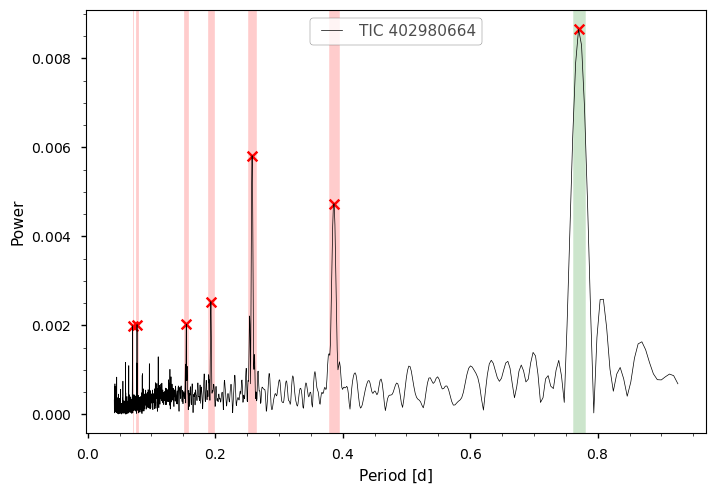

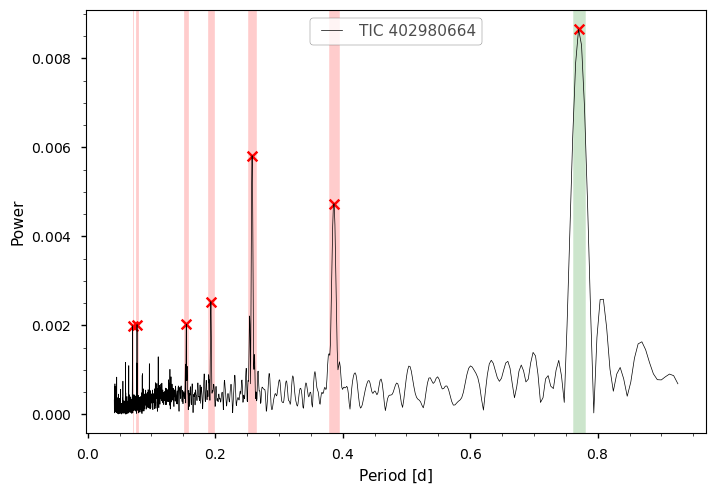

In [59]:
lombscargle(Sector_25)

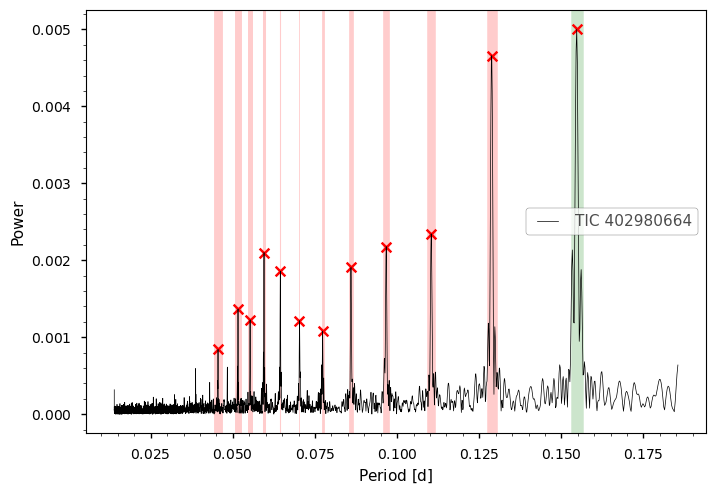

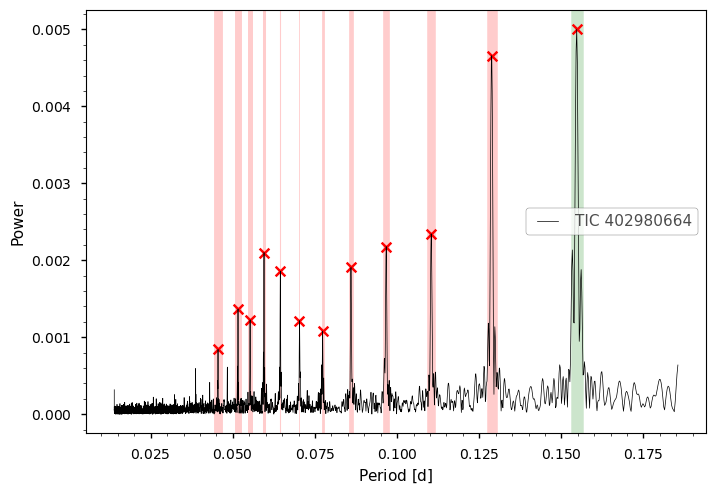

In [52]:
lombscargle(Sector_53)

In [54]:
table53

Harmonic,Period,Power,Relative Power
str13,float64,float64,float64
Main Harmonic,0.15471517796680068,0.004964410704536328,1.0
Harmonic 1,0.07733829903602789,0.0010713644985393914,0.21580899774476978
Harmonic 1,0.07028219340849799,0.0012286623721790497,0.24749410258428764
Harmonic 2,0.055227928380507586,0.0012223990517762698,0.24623245829747295
Harmonic 2,0.05155458079415989,0.0013577838121404868,0.2735035219587664


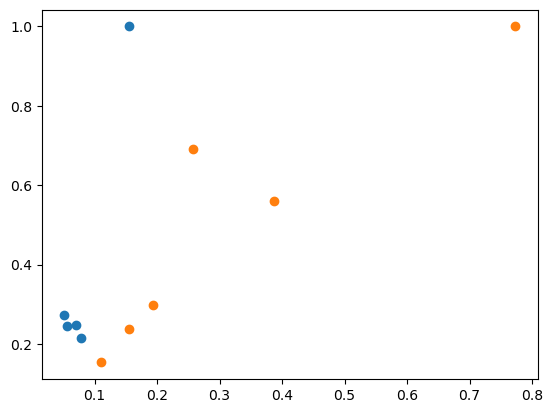

In [4]:
plt.scatter(table53["Period"],table53["Relative Power"])
plt.scatter(table25["Period"],table25["Relative Power"])

In [5]:
#now that i have these 2 sectors into 2 tables, lets combine them into 1 graph

In [6]:
#first i wanna see what im working with

In [7]:
lombscargle(Sector_38)

NameError: name 'Sector_38' is not defined

In [8]:
lombscargle(Sector_11)

NameError: name 'Sector_11' is not defined

In [9]:
def get_sectors(tic):
    """Returns a list of available sectors given an TIC."""
    sectors = []
    for result in lk.search_tesscut(str(tic)):
        sectors.append(int(result.mission[0].split(" ")[2]))
        
    return {"tic": tic, "sectors": sectors}

def get_targets(tics):
    """Constructs a dictionary of TICs and available sectors from a list of TICs"""
    targets = []

    with tqdm(total=len(tics)) as pbar:
        for tic in tics:
            targets.append(get_sectors(tic))
            pbar.update()
    return targets

In [10]:
get_sectors('TIC 206544316')

{'tic': 'TIC 206544316', 'sectors': [1, 2, 28, 29, 68, 69]}

In [11]:
Sector_69 = load_lc(tic='TIC 206544316', sector=69)
Sector_69

time,flux,flux_err
,,
Time,float64,float64
3184.360231899749,-0.0248625023739246,nan
3184.3625467160527,-0.0349979795714831,nan
3184.3648615323564,-0.0329932497721538,nan
3184.367176348662,-0.0376228471449612,nan
3184.3694911649645,-0.0380894855647556,nan
3184.371805981036,-0.0444062462088528,nan
3184.3741207973385,-0.0417120141274657,nan
3184.3764356136426,-0.0396846759627649,nan


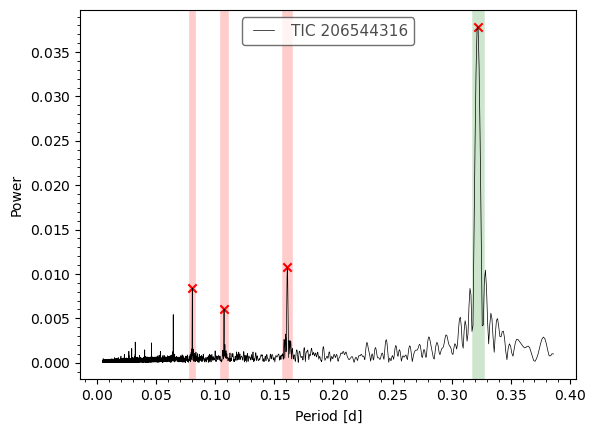

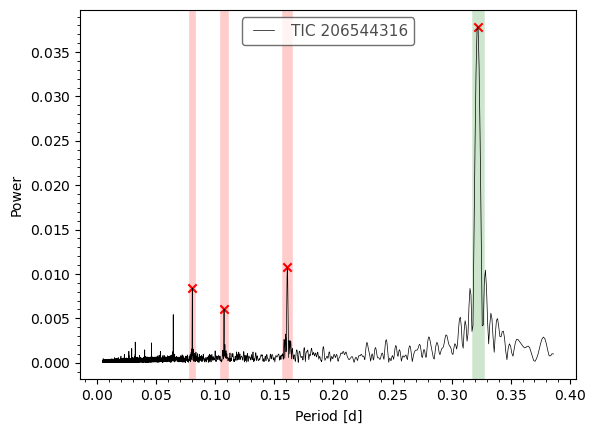

In [12]:
lombscargle(Sector_69)

In [13]:
harmonic_checker(Sector_69)

('Complex',
 <Table length=4>
    Harmonic          Period              Power            Relative Power  
     str13           float64             float64              float64      
 ------------- ------------------- -------------------- -------------------
 Main Harmonic  0.3216678565125147 0.038107013241107074                 1.0
    Harmonic 1 0.16097176553794545 0.010764405528773825  0.2824783317618282
    Harmonic 2 0.10734517587679471   0.0059767813303311  0.1568420304292907
    Harmonic 3  0.0805203864066787 0.008396593490889979 0.22034247181126082)

In [14]:
Sector_68 = load_lc(tic='TIC 206544316', sector=68)
Sector_68

time,flux,flux_err
,,
Time,float64,float64
3154.614580544448,0.045583588631965,nan
3154.6168954196555,0.0511475754472267,nan
3154.619210295095,0.0387891151983349,nan
3154.6215251705357,0.0463616494192692,nan
3154.623840045976,0.0433659313039542,nan
3154.626154921182,0.0400963803960608,nan
3154.628469796623,0.0500036662756499,nan
3154.630784672063,0.0487174482069765,nan


('Complex',
 <Table length=3>
    Harmonic          Period              Power            Relative Power  
     str13           float64             float64              float64      
 ------------- ------------------- -------------------- -------------------
 Main Harmonic  0.3224092421586902 0.037304066683161996                 1.0
    Harmonic 1  0.1609927216734059 0.007907180663945645 0.21196564790387112
    Harmonic 3 0.08049053674825789 0.008635276314343701 0.23148351056967795)

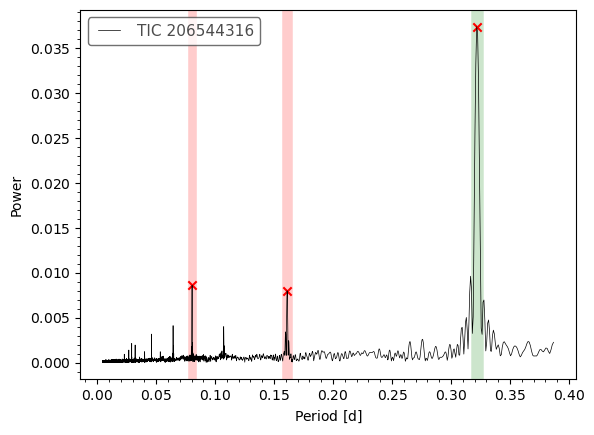

In [15]:
lombscargle(Sector_68)
harmonic_checker(Sector_68)

In [16]:
get_sectors('TIC 300651846')

{'tic': 'TIC 300651846',
 'sectors': [6,
  5,
  4,
  3,
  1,
  2,
  10,
  13,
  11,
  12,
  8,
  7,
  9,
  27,
  33,
  30,
  32,
  31,
  28,
  29,
  39,
  36,
  37,
  38,
  34,
  35,
  68,
  65,
  66,
  61,
  69,
  62,
  63,
  64]}

In [17]:
Sector_66 = load_lc(tic='TIC 300651846', sector=66)
Sector_66
Sector_68_2 = load_lc(tic='TIC 300651846', sector=68)
Sector_68_2
Sector_69_2 = load_lc(tic='TIC 300651846', sector=69)
Sector_69_2

time,flux,flux_err
,,
Time,float64,float64
3184.356741353228,-0.02923663157409,nan
3184.3590561447336,0.0126300268817806,nan
3184.3613709362407,0.0254642263513637,nan
3184.3636857277497,-0.0041371939480711,nan
3184.3660005191978,0.0130956035393246,nan
3184.3683153107045,0.0128158905017259,nan
3184.370630102154,-0.0165303059931291,nan
3184.372944893661,0.0235216776243231,nan


('Complex',
 <Table length=5>
    Harmonic          Period              Power            Relative Power  
     str13           float64             float64              float64      
 ------------- ------------------- -------------------- -------------------
 Main Harmonic  0.3436174690610638 0.019501219806461263                 1.0
    Harmonic 1 0.17186203044180462 0.003952064427957648 0.20265729360417886
    Harmonic 3 0.08600003626430969 0.006037030674846319  0.3095719516399735
    Harmonic 4 0.06879324929214362 0.005227582419096674  0.2680643811503852
    Harmonic 5 0.05732394185128949 0.004416852431438437 0.22649108493074974)

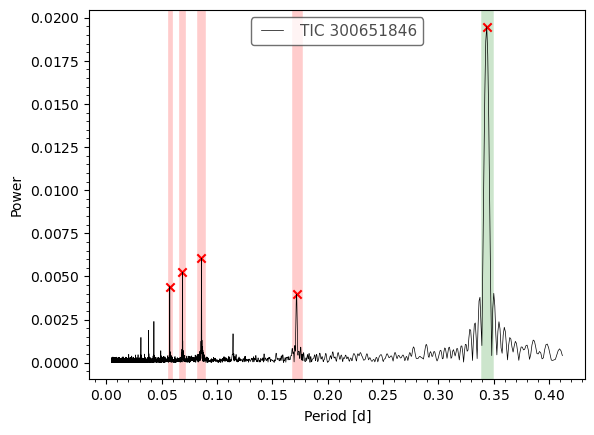

In [18]:
lombscargle(Sector_66 )
harmonic_checker(Sector_66)

('Complex',
 <Table length=5>
    Harmonic          Period               Power            Relative Power  
     str13           float64              float64              float64      
 ------------- ------------------- --------------------- -------------------
 Main Harmonic 0.34417226887439917  0.012514850460869788                 1.0
    Harmonic 1 0.17184447448950238 0.0025215992225103598 0.20148856196042053
    Harmonic 2 0.11470025008503587 0.0024931398194886407 0.19921451137462223
    Harmonic 3 0.08596921818118282  0.002344797319525189 0.18736119355614134
    Harmonic 4 0.06878289642749556  0.004780109268470198 0.38195496489679814)

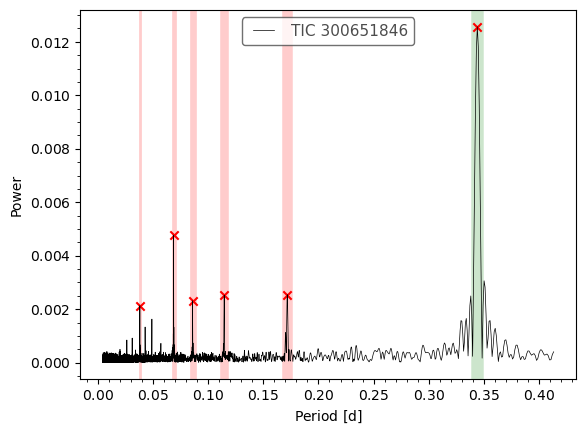

In [19]:
lombscargle(Sector_68_2)
harmonic_checker(Sector_68_2)

('Complex',
 <Table length=5>
    Harmonic          Period                Power            Relative Power  
     str13           float64               float64              float64      
 ------------- -------------------- --------------------- -------------------
 Main Harmonic  0.34400444879053077  0.013304417883232814                 1.0
    Harmonic 1  0.17215990024987873 0.0027390483860761684  0.2058751017981865
    Harmonic 2  0.11469759756423833 0.0028097116590175665 0.21118636558752168
    Harmonic 4   0.0687822803701483  0.004599871683832133 0.34574016873216395
    Harmonic 5 0.054226731628339846 0.0021291813876527783 0.16003566682433557)

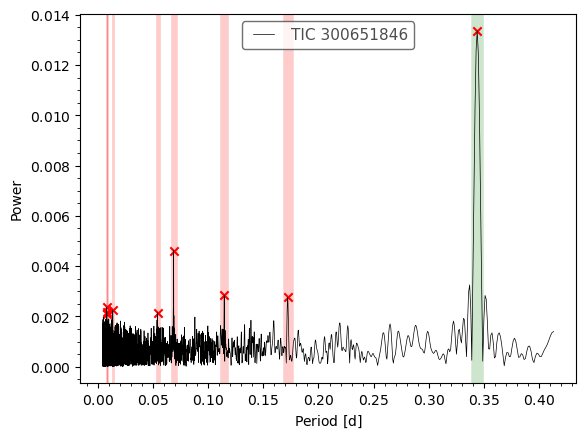

In [20]:
lombscargle(Sector_69_2)
harmonic_checker(Sector_69_2)

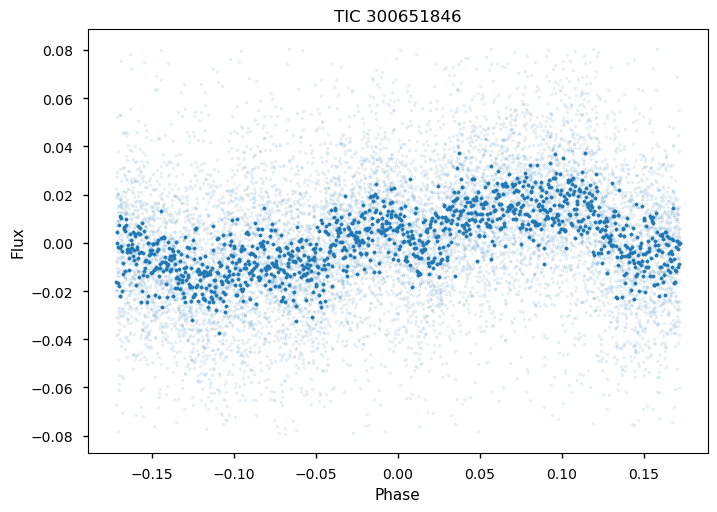

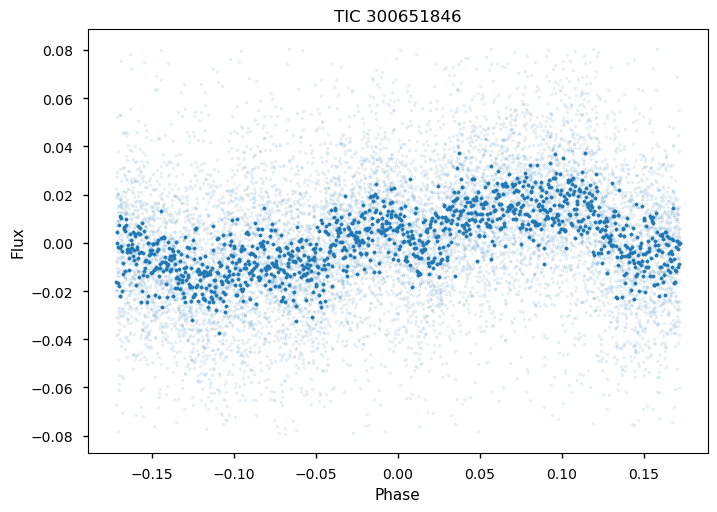

In [21]:
graph_lc(Sector_69_2)

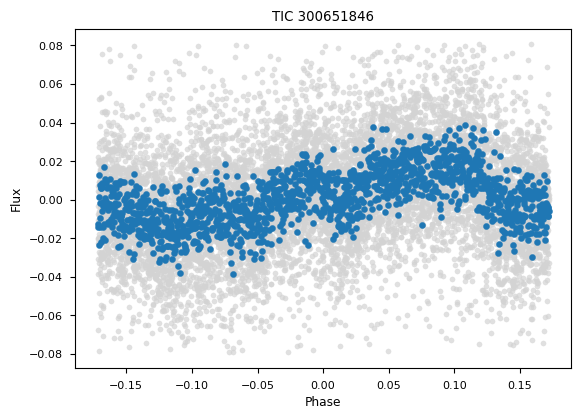

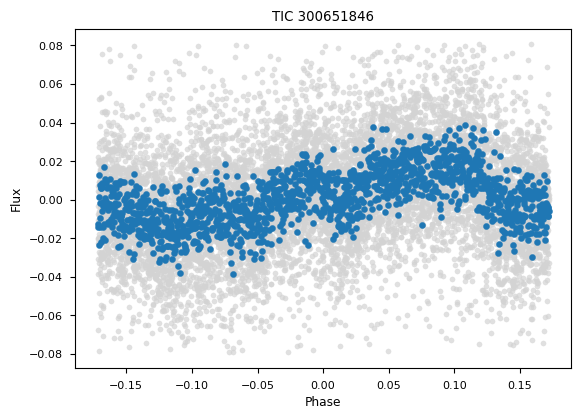

In [22]:
graph_lc_paper(Sector_69_2)

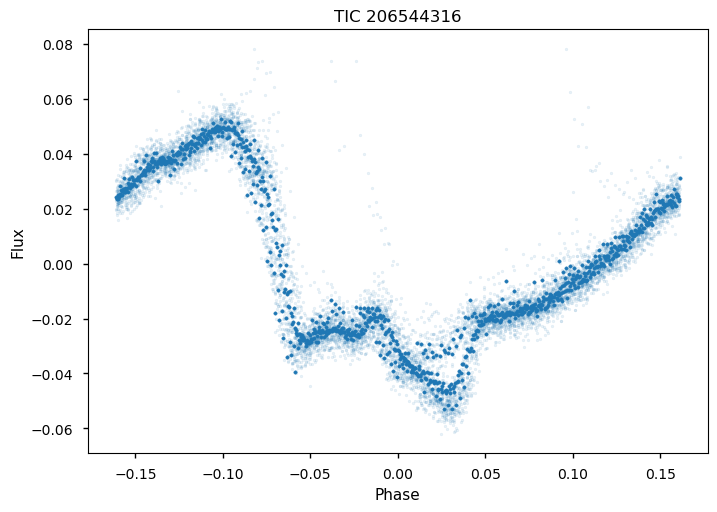

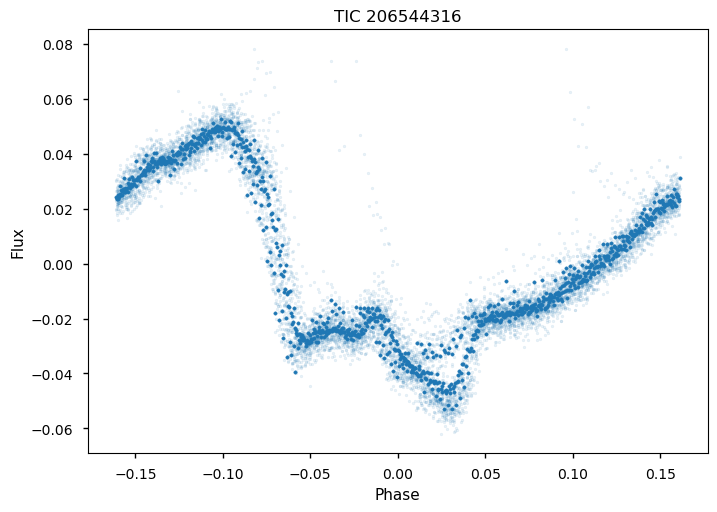

In [23]:
graph_lc(Sector_69)

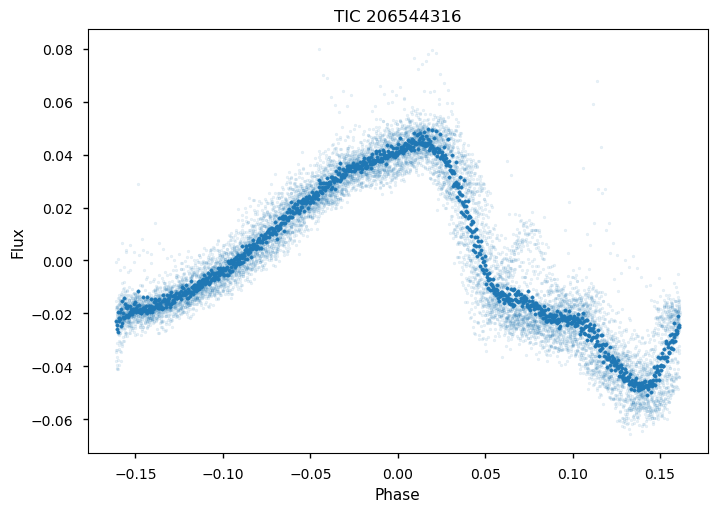

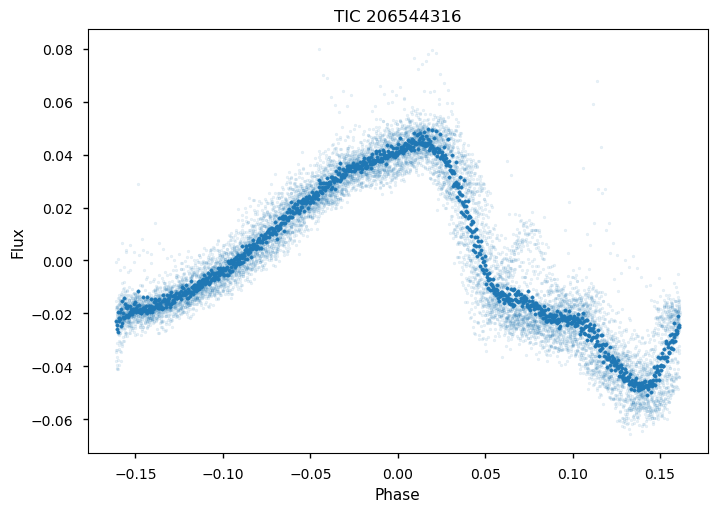

In [24]:
graph_lc(Sector_68)

In [25]:
get_sectors('TIC 368129164')

{'tic': 'TIC 368129164', 'sectors': [23, 50, 77]}

In [26]:
sec_77 = load_lc(tic='TIC 368129164', sector=77)
sec_77

time,flux,flux_err
,,
Time,float64,float64
3395.49130341034,-0.0036468034330047,nan
3395.49361824174,0.0016846471566616,nan
3395.4959330726733,-0.0027491088949842,nan
3395.498247903606,-0.0034591618730285,nan
3395.500562734538,-0.0039589807286956,nan
3395.5028775654728,0.0008489576489411,nan
3395.5051923964056,0.0031259778054381,nan
3395.5075072273385,0.0012534724412548,nan


('Complex',
 <Table length=7>
    Harmonic          Period                Power            Relative Power  
     str13           float64               float64              float64      
 ------------- -------------------- --------------------- -------------------
 Main Harmonic  0.26838712076355914  0.004666159189790765                 1.0
    Harmonic 1  0.13403562976975575 0.0012160578580836334  0.2606121670139939
    Harmonic 2  0.08937894730012953 0.0011468552880462906 0.24578143209420095
    Harmonic 3  0.06707446187387824 0.0013579511936987591 0.29102118861908155
    Harmonic 4 0.053658379611179426 0.0013878127553206287 0.29742079060591575
    Harmonic 5  0.04471465531823395 0.0009531972213732662 0.20427876174023296
    Harmonic 6 0.038326442717059345 0.0008292643404005011 0.17771882755626392)

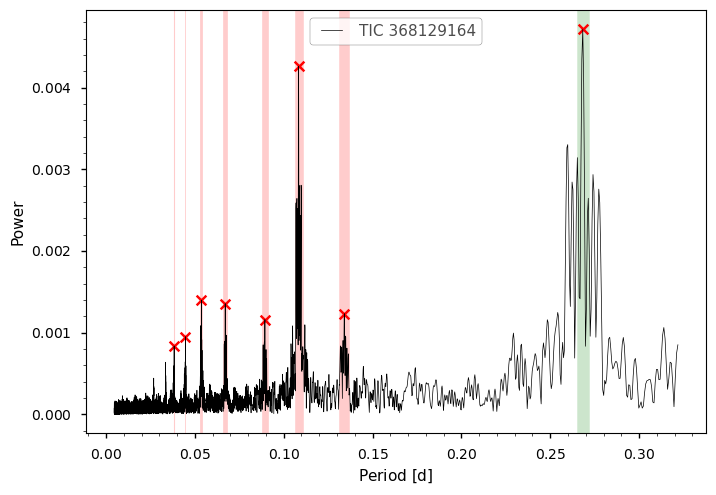

In [27]:
lombscargle(sec_77)
harmonic_checker(sec_77)

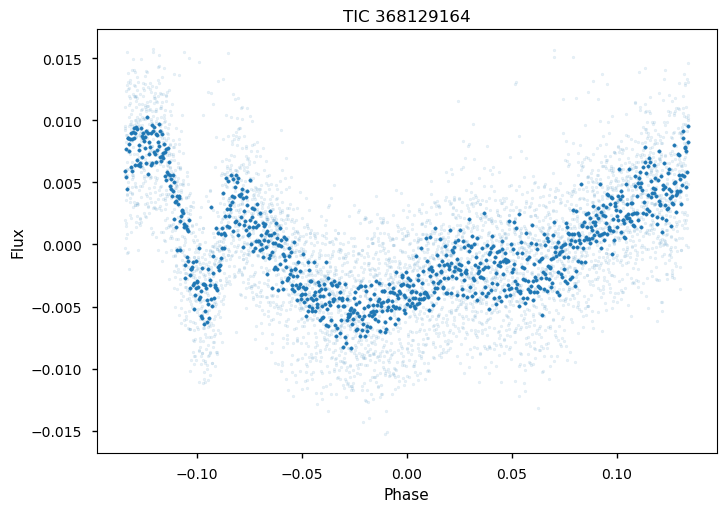

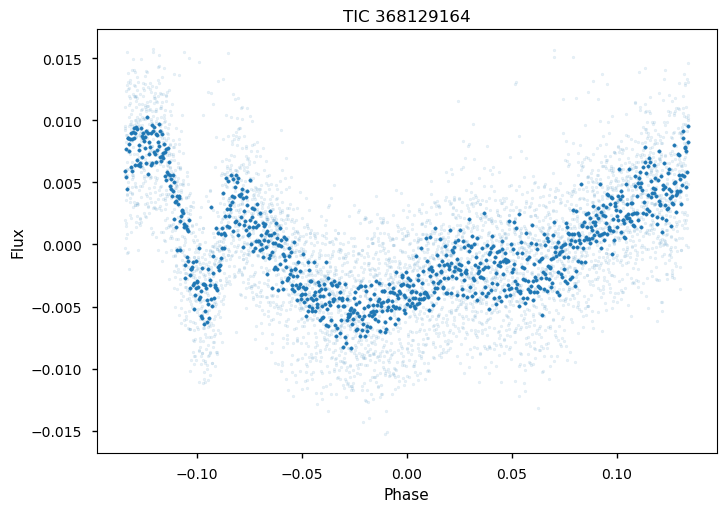

In [28]:
graph_lc(sec_77)

In [29]:
get_sectors('TIC 405754448')

{'tic': 'TIC 405754448', 'sectors': [11, 37, 38, 65, 64]}

In [30]:
sec_65 = load_lc(tic='TIC 405754448', sector = 65)
sec_64 = load_lc(tic='TIC 405754448', sector = 64)
sec_65
sec_64

time,flux,flux_err
,,
Time,float64,float64
3041.120198438318,0.0205562963374649,nan
3041.122513320064,0.0191985140666601,nan
3041.1248282015767,0.0158643723410283,nan
3041.127143083323,0.0149556134166702,nan
3041.129457965069,0.015496137340294,nan
3041.131772846582,0.017824946444847,nan
3041.134087728095,0.0151183739116338,nan
3041.136402609841,0.0174752423537153,nan


('Complex',
 <Table length=3>
    Harmonic          Period               Power            Relative Power  
     str13           float64              float64              float64      
 ------------- ------------------- --------------------- -------------------
 Main Harmonic   0.537604200041102  0.010809633882654966                 1.0
    Harmonic 1   0.269248512132703  0.003966086997024533  0.3669029904323104
    Harmonic 2 0.17936422725978748 0.0016773244631972581 0.15516940549565483)

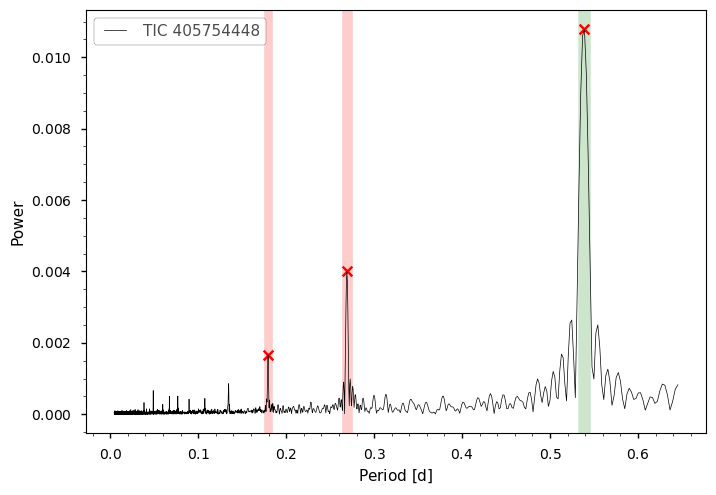

In [31]:
lombscargle(sec_65)
harmonic_checker(sec_65)

('Complex',
 <Table length=3>
    Harmonic          Period               Power            Relative Power  
     str13           float64              float64              float64      
 ------------- ------------------- --------------------- -------------------
 Main Harmonic  0.5388089812081738  0.009901141163975028                 1.0
    Harmonic 1  0.2691006206233851 0.0036235527391754287 0.36597324279746707
    Harmonic 2 0.17933298860236702 0.0015908807520170298 0.16067650442207573)

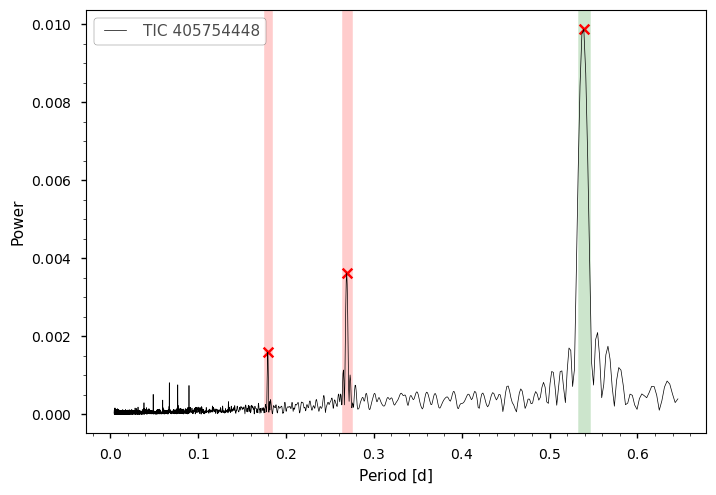

In [32]:
lombscargle(sec_64)
harmonic_checker(sec_64)

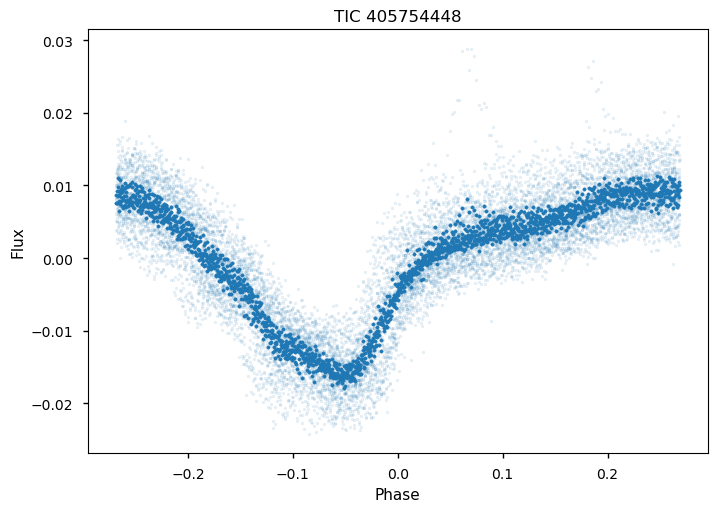

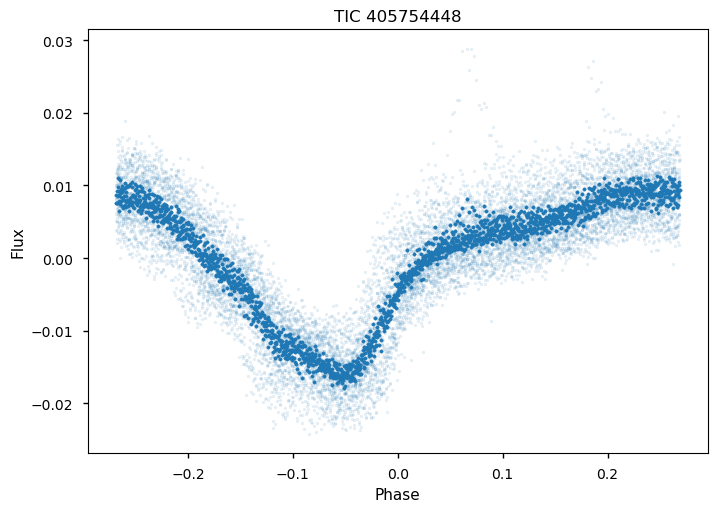

In [33]:
graph_lc(sec_65)

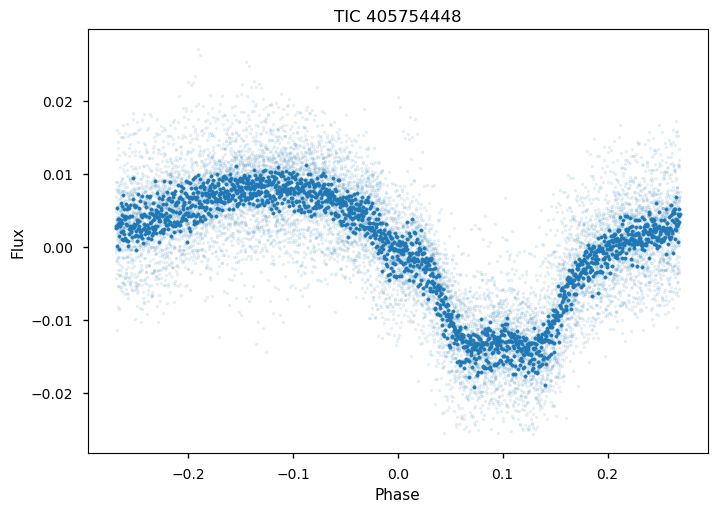

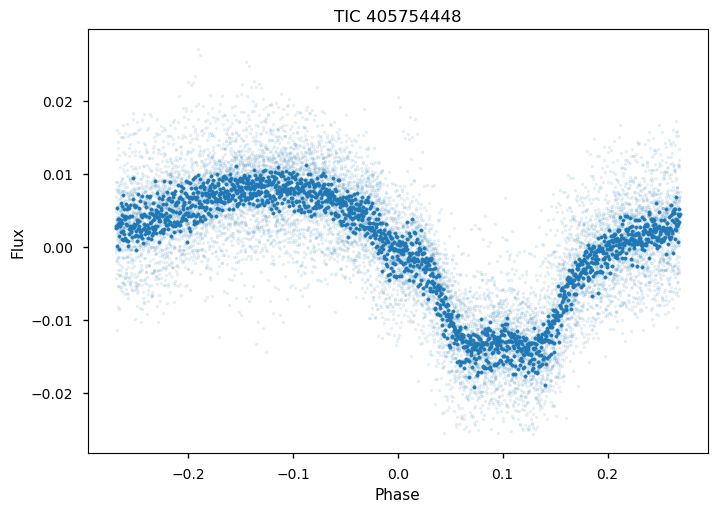

In [34]:
graph_lc(sec_64)

In [35]:
normie =load_lc(tic='TIC 176852917', sector=31)


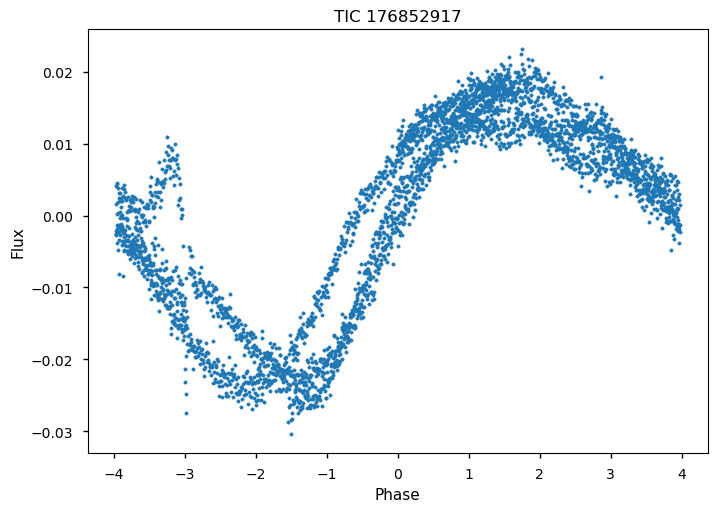

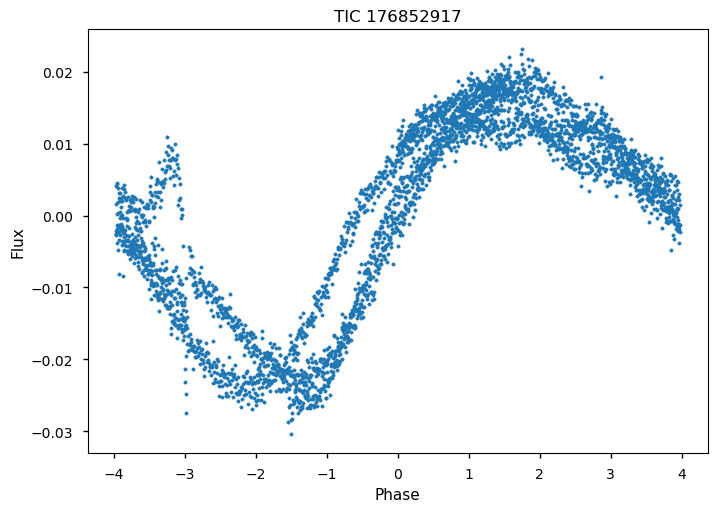

In [36]:
graph_lc(normie)

In [37]:
realnormie = load_lc(tic = 'TIC 460950389', sector =38)

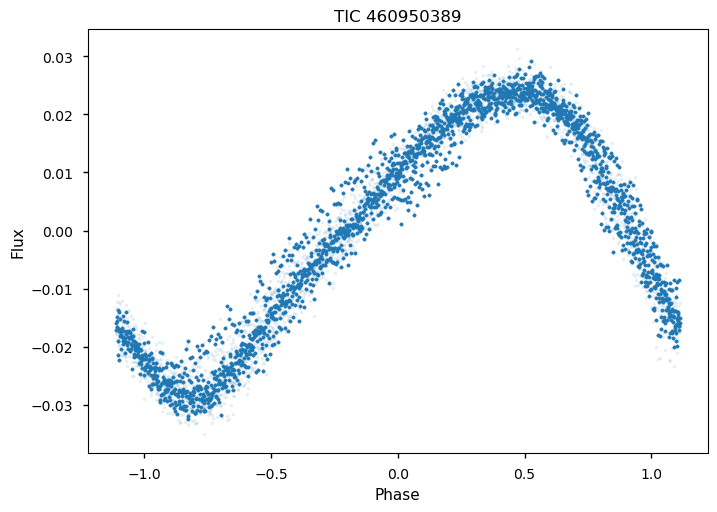

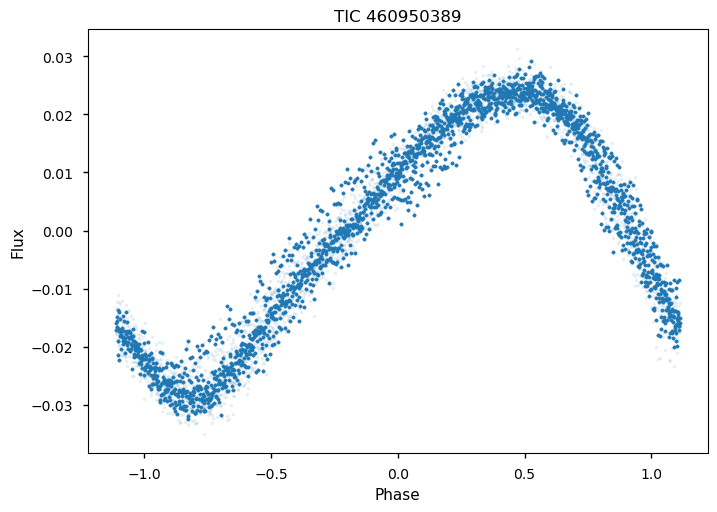

In [38]:
graph_lc(realnormie)

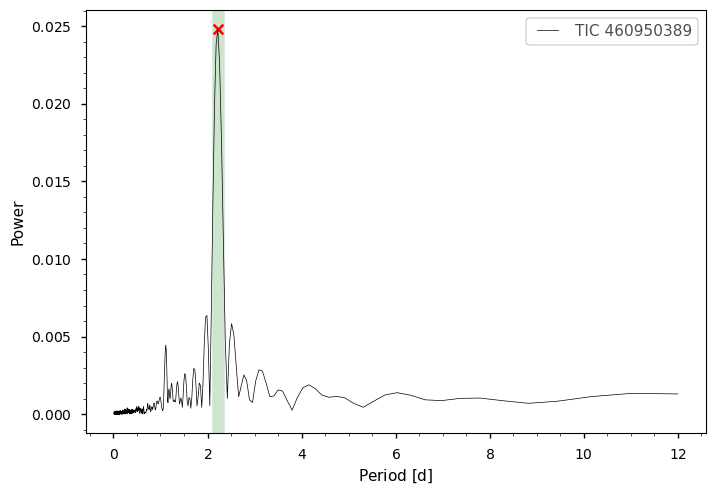

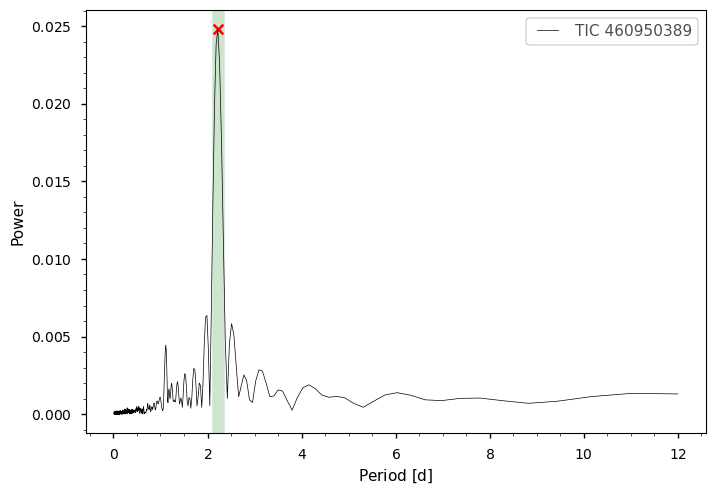

In [39]:
lombscargle(realnormie, period=10)

In [40]:
harmonic_checker(realnormie)

('Not Complex',
 <Table length=1>
    Harmonic         Period              Power        Relative Power
     str13          float64             float64          float64    
 ------------- ------------------ ------------------- --------------
 Main Harmonic 2.2063322114388777 0.02483123812069647            1.0)

In [41]:
get_sectors('TIC 167664935')

{'tic': 'TIC 167664935', 'sectors': [11, 38, 65]}

In [42]:
mroww = load_lc(tic = 'TIC 167664935', sector=65)

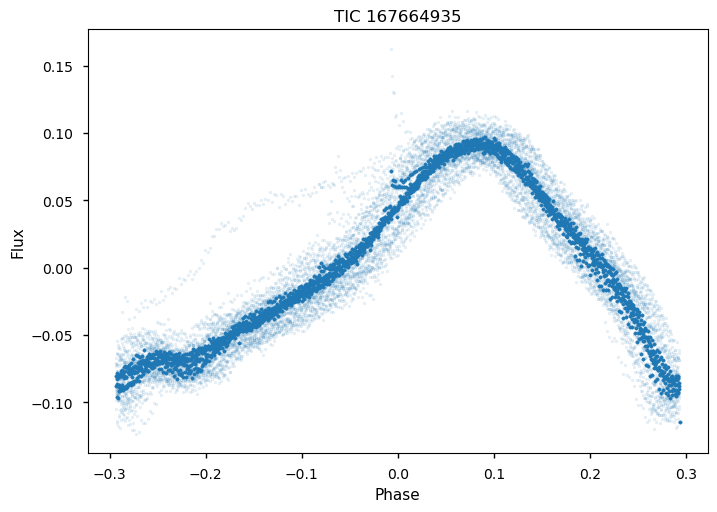

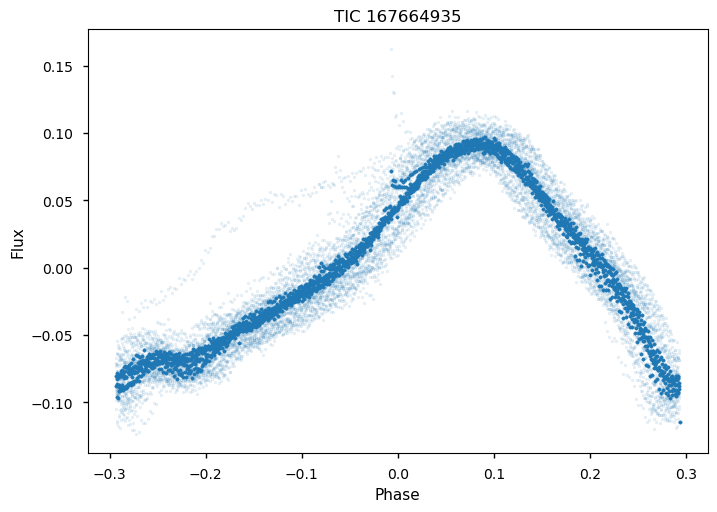

In [43]:
graph_lc(mroww)

In [44]:
harmonic_checker(mroww)

('Double Dip',
 <Table length=2>
    Harmonic          Period              Power           Relative Power  
     str13           float64             float64             float64      
 ------------- ------------------- -------------------- ------------------
 Main Harmonic  0.5862015523259476  0.08005731429345682                1.0
    Harmonic 1 0.29327481265698446 0.016418415835872623 0.2050832704141128)

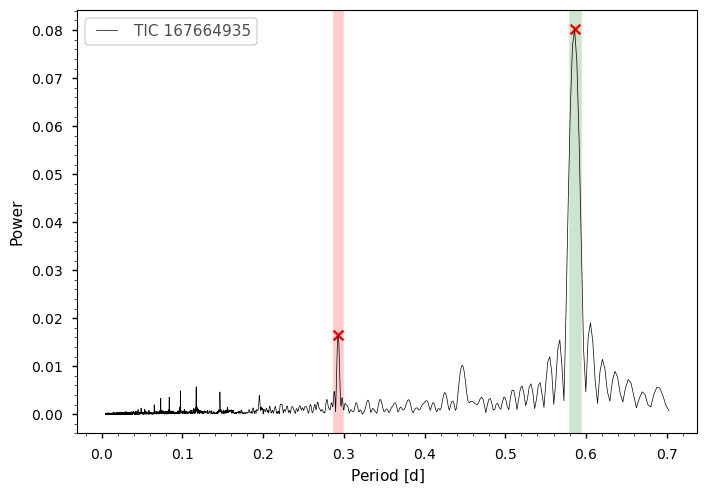

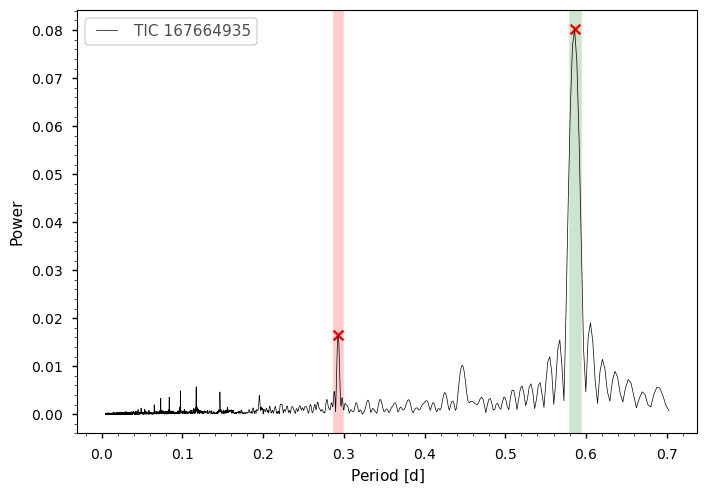

In [45]:
lombscargle(mroww)

In [60]:
#pasting my complex checker here


In [61]:
def complex_rotator_check(tic):
    from astropy.io import ascii
 
    results = []
    available_sectors = (get_sectors(tic))['sectors']
    for i in range(len(available_sectors)):      
        if available_sectors[i] > 56:
            lc = load_lc(tic = tic, sector=available_sectors[i])
            multiplot(lc)
            plt.savefig('/Panels/tic['(tic)']_sector{'available_sectors[i]'}.png',dpi=150)
            result, table = harmonic_checker(lc)
            table_data=table
            ascii.write(table_data,'Harmonic_Tables/tic['(tic)']_s{'available_sectors[i]'}_harmonics.csv',format='csv',fast_writer=False)
            results.append(result, available_sectors)
            result_data=result
            ascii.write(result_data,'Harmonic_Tables/tic['(tic)']_s{'available_sectors[i]'}_harmonics.csv',format='csv',fast_writer=False)
    return result,table


SyntaxError: invalid syntax. Perhaps you forgot a comma? (608406735.py, line 10)